In [1]:
from keras.datasets import fashion_mnist
import numpy as np
from sklearn import datasets
from sklearn.model_selection import StratifiedKFold
from neupy import algorithms, estimators, environment
from neupy.algorithms import PNN
from keras.utils import np_utils

C:\Users\DELL\Anaconda3\envs\tfp3.6\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using Theano backend.
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\DELL\Anaconda3\envs\tfp3.6\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty stri

In [2]:
# Load the training and testing data
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
# Display purpose:
X_train_orig = X_train
X_test_orig = X_test

skfold = StratifiedKFold(n_splits=10)

In [3]:
from keras import backend as K
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    shape_ord = (1, img_rows, img_cols)
else:  # channel_last
    shape_ord = (img_rows, img_cols, 1)

In [4]:

X_train = X_train.reshape((X_train.shape[0],) + shape_ord)
X_test = X_test.reshape((X_test.shape[0],) + shape_ord)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

[9 0 0 3 0 2 7 2 5 5]


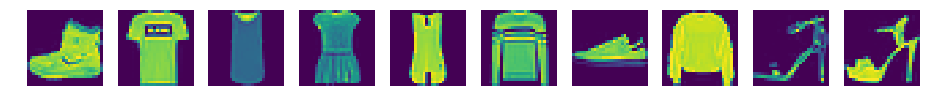

In [6]:
print(Y_train[0:10])

slice = 10
plt.figure(figsize=(16,8))
for i in range(slice):
    plt.subplot(1, slice, i+1)
    plt.imshow(X_train_orig[i], interpolation='nearest')
    plt.axis('off')

In [7]:
(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

In [8]:
# skf = model_selection.StratifiedKFold(n_splits=5)
# skf_iterator = skf.split(x_train, y_train)
# # Converting the classes to its binary categorical form
# nb_classes = 10
# Y_train = np_utils.to_categorical(Y_train, nb_classes)
# Y_test = np_utils.to_categorical(Y_test, nb_classes)

In [9]:
(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

In [12]:
#did not do one hot encoding since it was giving error
#now another error is coming is ValueError: operands could not be broadcast together with shapes (60000,28,28,1) (28,1680000,1) 

#Y_train = np.pad(Y_train, 1, mode='constant'))

pnn_network = PNN(std=0.1, verbose=False)
#pnn_network.fit(X_train, Y_train)
pnn_network.train(X_train, Y_train)
result = pnn_network.predict(X_test)

n_predicted_correctly = np.sum(result == Y_test)
score = metrics.roc_auc_score(result, Y_test)
accurucy = metrics.accuracy_score(result, Y_test)
scores.append(score)
n_test_samples = test.size
print("Test #{:<2}: Guessed {} out of {}".format(i, n_predicted_correctly, n_test_samples))
print("ROC AUC score: {:.4f}".format(score))
print("Accurucy: {:.2%}".format(accurucy))
print(metrics.confusion_matrix(result, Y_test))


# this code is for multifold validation
# for i, (train_index, test_index) in enumerate(skfold.split(X_train, Y_train), start=1):
#     x_fold_train, x_fold_test = X_train[train_index], X_train[test_index]
#     y_fold_train, y_fold_test = Y_train[train_index], Y_train[test_index]

#     pnn_network = PNN(std=0.1, verbose=False)
#     pnn_network.fit(x_fold_train, y_fold_train)
#    # pnn_network.train(x_train, y_train)
#     result = pnn_network.predict(x_fold_test)

#     n_predicted_correctly = np.sum(result == y_fold_test)
#     score = metrics.roc_auc_score(result, y_fold_test)
#     accurucy = metrics.accuracy_score(y_predicted, y_fold_test)
#     scores.append(score)
#     n_test_samples = test.size
#     print("Test #{:<2}: Guessed {} out of {}".format(i, n_predicted_correctly, n_test_samples))
#     print("ROC AUC score: {:.4f}".format(score))
#     print("Accurucy: {:.2%}".format(accurucy))
#     print(metrics.confusion_matrix(y_predicted, y_fold_test))

Time: 0:00:00 |N/A%|                                           | ETA:  --:--:--

ValueError: operands could not be broadcast together with shapes (60000,28,28,1) (28,1680000,1) 

In [ ]:
grnnet = algorithms.GRNN(std=0.5, verbose=True)
grnnet.train(X_train, Y_train)

In [ ]:
grnnet.predict(X_test)